In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statistics as st 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor 
from lightgbm import LGBMRegressor 
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error,r2_score ,root_mean_squared_error 
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold

In [3]:
df=pd.read_csv(r'/Users/Humphrey/Downloads/archive (4)/Train.csv')
pd.options.display.max_columns=27
pd.options.display.max_rows=4000

In [4]:
df.head()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,Former,NaN,Low-carb,NaN,NaN,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,Current,Occasional,Balanced,Hypertension,NaN,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,Never,NaN,Balanced,Hypertension,Regular,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,Never,NaN,Balanced,Diabetes,Occasional,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,Former,Frequent,Vegetarian,NaN,NaN,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


In [5]:
df.describe()

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785,53.485667
std,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595,20.569690
min,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000
25%,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285,36.000000
50%,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789,53.000000
75%,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349,72.000000
max,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000


In [6]:
df['Alcohol Consumption']=df['Alcohol Consumption'].fillna('Occasional')
df['Medication Use']=df['Medication Use'].fillna('Regular')
df['Family History']=df['Family History'].fillna('Diabetes')
df['Education Level']=df['Education Level'].fillna('Undergraduate')
df['Chronic Diseases']=df['Chronic Diseases'].fillna('Hypertension')

In [7]:
df.Gender.value_counts()

Gender
Female    1511
Male      1489
Name: count, dtype: int64

In [8]:
def converterlabel_encode(data):
     encode=LabelEncoder() 
     transformation_data=encode.fit_transform(data) 
     return transformation_data

In [9]:
def converterbinary(data):
     encode=LabelBinarizer() 
     transformation_data=encode.fit_transform(data) 
     return transformation_data

In [10]:
df['Gender']=pd.DataFrame(converterbinary(df['Gender']))
df['Physical Activity Level']=pd.DataFrame(converterlabel_encode(df['Physical Activity Level']))
df['Smoking Status']=pd.DataFrame(converterlabel_encode(df['Smoking Status']))
df['Alcohol Consumption']=pd.DataFrame(converterbinary(df['Alcohol Consumption']))
df['Smoking Status']=pd.DataFrame(converterlabel_encode(df['Smoking Status']))
df['Diet']=pd.DataFrame(converterlabel_encode(df['Diet']))
df['Chronic Diseases']=pd.DataFrame(converterlabel_encode(df['Chronic Diseases']))
df['Medication Use']=pd.DataFrame(converterbinary(df['Medication Use']))
df['Family History']=pd.DataFrame(converterlabel_encode(df['Family History']))
df['Mental Health Status']=pd.DataFrame(converterlabel_encode(df['Mental Health Status']))
df['Sleep Patterns']=pd.DataFrame(converterlabel_encode(df['Sleep Patterns']))
df['Education Level']=pd.DataFrame(converterlabel_encode(df['Education Level'])) 
df['Income Level']=pd.DataFrame(converterlabel_encode(df['Income Level']))
df['Blood Pressure (s/d)']=pd.DataFrame(converterlabel_encode(df['Blood Pressure (s/d)']))

In [11]:
#check for outliers
outliers=[] 
def detect_outlier(data):
      threshold=3
      mean=np.mean(data)
      std=np.std(data)
      for i in data:
          z_score=(i - mean)/std
          if np.abs(z_score) >threshold:
              outliers.append(i) 
      return outliers

<Axes: ylabel='Weight (kg)'>

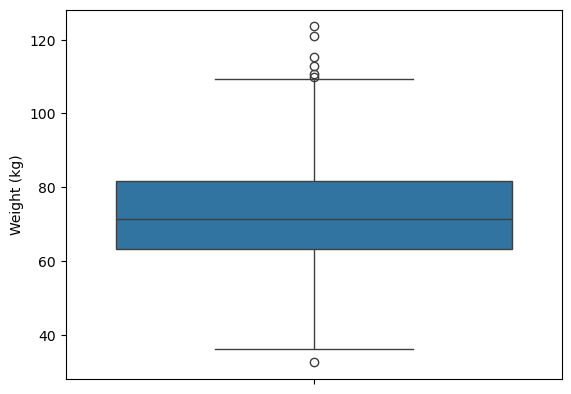

In [12]:
sns.boxplot(df['Weight (kg)'])

In [13]:
x_data=df.drop(columns='Age (years)')
y=df['Age (years)']

In [14]:
scalar=StandardScaler() 
x_scale=scalar.fit_transform(x_data)
x=pd.DataFrame(x_scale,columns=x_data.columns) 
x.head()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level
0,1.007360,0.275255,1.034833,0.333171,1.037470,0.886932,1.701081,-1.801746,-1.309503,0.821119,0.949908,-0.100242,0.573245,0.724713,0.667635,0.571705,-0.609954,-1.685348,0.505784,-0.505900,-1.036748,0.039486,0.331947,0.91045,1.066265
1,1.007360,0.468750,0.538701,-0.888883,1.207329,0.246577,-0.447021,-0.681807,-0.988497,0.531535,-0.297782,-1.390913,0.573245,-1.030040,0.667635,0.571705,0.740497,-1.578733,0.505784,0.885209,1.494861,0.781537,-0.586438,0.91045,1.066265
2,-0.992693,-1.360965,-1.772009,0.946586,-1.067962,-1.221225,0.929241,-1.033680,-1.077411,0.526607,0.949908,1.190428,0.573245,-1.030040,0.667635,0.571705,2.090948,-0.648420,1.583448,-0.505900,1.454120,1.209157,-0.161881,0.91045,1.066265
3,-0.992693,0.052464,-1.252553,-0.924686,0.785321,-1.363735,0.592362,0.569177,0.187074,2.281748,0.949908,1.190428,0.573245,-1.030040,-1.905139,-1.749154,2.090948,-0.737829,1.583448,-0.505900,-0.302987,0.880039,-0.924062,0.91045,-0.146318
4,-0.992693,-0.520099,0.108355,1.509877,0.085250,0.465336,1.024787,-1.121453,-0.799873,0.381138,-0.297782,-0.100242,-1.744456,1.602089,0.667635,0.571705,-0.609954,-0.922682,0.505784,0.885209,-0.556389,1.532645,-0.597968,0.91045,-1.358902


In [15]:
vif=pd.DataFrame() 
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(0,len(x.columns))] 
vif['features']=x.columns 
vif

,vif,features
0,2.582292,Gender
1,40.583837,Height (cm)
2,101.987844,Weight (kg)
3,1.641950,Blood Pressure (s/d)
4,1.224398,Cholesterol Level (mg/dL)
5,90.805068,BMI
6,1.215842,Blood Glucose Level (mg/dL)
7,4.346320,Bone Density (g/cm²)
8,3.861792,Vision Sharpness
9,1.907059,Hearing Ability (dB)


In [16]:
mi=pd.DataFrame()
mi['mutual_info']=mutual_info_regression(x,y)
mi['features']=x.columns 
mi

,mutual_info,features
0,0.015680,Gender
1,0.027862,Height (cm)
2,0.000000,Weight (kg)
3,0.248477,Blood Pressure (s/d)
4,0.089272,Cholesterol Level (mg/dL)
5,0.004264,BMI
6,0.102104,Blood Glucose Level (mg/dL)
7,1.012313,Bone Density (g/cm²)
8,0.784794,Vision Sharpness
9,0.358837,Hearing Ability (dB)


In [17]:
features=x[['Blood Pressure (s/d)','Bone Density (g/cm²)','Hearing Ability (dB)']]
features.head()

,Blood Pressure (s/d),Bone Density (g/cm²),Hearing Ability (dB)
0,0.333171,-1.801746,0.821119
1,-0.888883,-0.681807,0.531535
2,0.946586,-1.033680,0.526607
3,-0.924686,0.569177,2.281748
4,1.509877,-1.121453,0.381138


In [18]:
print(f"the shape of the data is {features.shape}")

the shape of the data is (3000, 3)


In [19]:
# random split
x_train,x_test,y_train,y_test=train_test_split(features,y,test_size=0.2,random_state=42)

In [20]:
print(f"the train data set {x_train.shape}")
print(f"the train data set {x_test.shape}")

the train data set (2400, 3)
the train data set (600, 3)


In [21]:
lg=LinearRegression()
lg.fit(x_train,y_train)
lg_prediction=lg.predict(x_train)
lg_pred={'Actual':y_train,'predcitions':np.round(lg_prediction,2)}
prediction_lg=pd.DataFrame(lg_pred)
r2_lg=r2_score(y_train,lg_prediction)
print(f"the score is {r2_lg}")
mape=mean_absolute_percentage_error(y_train,lg_prediction)
print(f"the avg percentage error is {mape*100}%")
mae=mean_absolute_error(y_train,lg_prediction)
print(f"the mean absolute error  is {mae}")
rmsqe=np.sqrt(mean_squared_error(y_train,lg_prediction))
print(f"the rootmean square  error is {rmsqe}") # This show that the on average the age is about 6years away from the actual age

the score is 0.9041090592955248
the avg percentage error is 11.5001187915797%
the mean absolute error  is 5.106847353817697
the rootmean square  error is 6.39294824760042


In [22]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_prediction=dt.predict(x_train)
dt_pred={'Actual':y_train,'predcitions':np.round(dt_prediction,2)}
prediction_dt=pd.DataFrame(dt_pred)
r2_dt=r2_score(y_train,dt_prediction)
print(f"the score is {r2_dt}")
mape_dt=mean_absolute_percentage_error(y_train,dt_prediction)
print(f"the avg percentage error is {mape_dt*100}%")
mae_dt=mean_absolute_error(y_train,dt_prediction)
print(f"the mean absolute error  is {mae_dt}")
rmsqe_dt=np.sqrt(mean_squared_error(y_train,dt_prediction))
print(f"the rootmean square  error is {rmsqe_dt}")

the score is 1.0
the avg percentage error is 0.0%
the mean absolute error  is 0.0
the rootmean square  error is 0.0


In [23]:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
kn_prediction=kn.predict(x_train)
kn_pred={'Actual':y_train,'predcitions':np.round(kn_prediction,2)}
prediction_kn=pd.DataFrame(kn_pred)
r2_kn=r2_score(y_train,kn_prediction)
print(f"the score is {r2_kn}")
mape_kn=mean_absolute_percentage_error(y_train,kn_prediction)
print(f"the avg percentage error is {mape_kn*100}%")
mae_kn=mean_absolute_error(y_train,kn_prediction)
print(f"the mean absolute error  is {mae_kn}")
rmsqe_kn=np.sqrt(mean_squared_error(y_train,kn_prediction))
print(f"the rootmean square  error is {rmsqe_kn}")

the score is 0.9274311165158252
the avg percentage error is 9.778834479988664%
the mean absolute error  is 4.415166666666667
the rootmean square  error is 5.561444656441946


In [24]:
rd=RandomForestRegressor()
rd.fit(x_train,y_train)
rd_prediction=rd.predict(x_train)
rd_pred={'Actual':y_train,'predcitions':np.round(rd_prediction,2)}
prediction_rd=pd.DataFrame(rd_pred)
r2_rd=r2_score(y_train,rd_prediction)
print(f"the score is {r2_rd}")
mape_rd=mean_absolute_percentage_error(y_train,rd_prediction)
print(f"the avg percentage error is {mape_rd*100}%")
mae_rd=mean_absolute_error(y_train,rd_prediction)
print(f"the mean absolute error  is {mae_rd}")
rmsqe_rd=np.sqrt(mean_squared_error(y_train,rd_prediction))
print(f"the rootmean square  error is {rmsqe_rd}")

the score is 0.985836982454626
the avg percentage error is 4.315320135605288%
the mean absolute error  is 1.9360958333333333
the rootmean square  error is 2.456915927540053


In [25]:
ls=LinearSVR()
ls.fit(x_train,y_train)
ls_prediction=ls.predict(x_train)
ls_pred={'Actual':y_train,'predcitions':np.round(ls_prediction,2)}
prediction_ls=pd.DataFrame(ls_pred)
r2_ls=r2_score(y_train,ls_prediction)
print(f"the score is {r2_ls}")
mape_ls=mean_absolute_percentage_error(y_train,ls_prediction)
print(f"the avg percentage error is {mape_ls*100}%")
mae_ls=mean_absolute_error(y_train,ls_prediction)
print(f"the mean absolute error  is {mae_ls}")
rmsqe_ls=np.sqrt(mean_squared_error(y_train,ls_prediction))
print(f"the rootmean square  error is {rmsqe_ls}")

the score is 0.9039747059415889
the avg percentage error is 11.468352483147186%
the mean absolute error  is 5.106322310902016
the rootmean square  error is 6.39742527841019


In [26]:
xg=XGBRegressor()
xg.fit(x_train,y_train)
xg_prediction=xg.predict(x_train)
xg_pred={'Actual':y_train,'predcitions':np.round(xg_prediction,2)}
prediction_xg=pd.DataFrame(xg_pred)
r2_xg=r2_score(y_train,xg_prediction)
print(f"the score is {r2_xg}")
mape_xg=mean_absolute_percentage_error(y_train,xg_prediction)
print(f"the avg percentage error is {mape_xg*100}%")
mae_xg=mean_absolute_error(y_train,xg_prediction)
print(f"the mean absolute error  is {mae_xg}")
rmsqe_xg=np.sqrt(mean_squared_error(y_train,xg_prediction))
print(f"the rootmean square  error is {rmsqe_xg}")

the score is 0.985466841410377
the avg percentage error is 4.11565749941074%
the mean absolute error  is 1.8619361885388692
the rootmean square  error is 2.4888137961653207


In [27]:
li=LGBMRegressor()
li.fit(x_train,y_train)
li_prediction=li.predict(x_train)
li_pred={'Actual':y_train,'predcitions':np.round(li_prediction,2)}
prediction_li=pd.DataFrame(li_pred)
r2_li=r2_score(y_train,li_prediction)
print(f"the score is {r2_li}")
mape_li=mean_absolute_percentage_error(y_train,li_prediction)
print(f"the avg percentage error is {mape_li*100}%")
mae_li=mean_absolute_error(y_train,li_prediction)
print(f"the mean absolute error  is {mae_li}")
rmsqe_li=np.sqrt(mean_squared_error(y_train,li_prediction))
print(f"the rootmean square  error is {rmsqe_li}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 3
[LightGBM] [Info] Start training from score 53.589583
the score is 0.9504890463547104
the avg percentage error is 8.068200763154%
the mean absolute error  is 3.6307699292289204
the rootmean square  error is 4.593704395100822


In [28]:
# checking for the model that over fitted 
kf=KFold(n_splits=10,shuffle=True, random_state=42)
for train_index,test_index in kf.split(features,y):
      x_train_kf,x_test_kf=features.iloc[train_index],features.iloc[test_index]
      y_train_kf,y_test_kf=y.iloc[train_index],y.iloc[test_index]

In [29]:
lg_m=LinearRegression()
lg_m.fit(x_train_kf,y_train_kf)
lgm_prediction=lg_m.predict(x_train_kf)
lgm_pred={'Actual':y_train_kf,'predcitions':np.round(lgm_prediction,2)}
prediction_lgm=pd.DataFrame(lgm_pred)
r2_lgm=r2_score(y_train_kf,lgm_prediction)
print(f"the score is {r2_lgm}")
mape=mean_absolute_percentage_error(y_train_kf,lgm_prediction)
print(f"the avg percentage error is {mape*100}%")
mae=mean_absolute_error(y_train_kf,lgm_prediction)
print(f"the mean absolute error  is {mae}")
rmsqe=np.sqrt(mean_squared_error(y_train_kf,lgm_prediction))
print(f"the rootmean square  error is {rmsqe}") # This show that 
cvm=cross_val_score(lg_m,x_train_kf,y_train_kf,cv=kf,scoring= 'neg_mean_squared_error')
print(f"to show if the model ovefit:{np.sqrt(-cvm).mean()}")

the score is 0.9004385156360318
the avg percentage error is 11.801153754724364%
the mean absolute error  is 5.20370224715561
the rootmean square  error is 6.493348470012948
to show if the model ovefit:6.500468786922122


In [30]:
dt=DecisionTreeRegressor()
dt.fit(x_train_kf,y_train_kf)
dt_prediction=dt.predict(x_train_kf)
dt_pred={'Actual':y_train_kf,'predcitions':np.round(dt_prediction,2)}
prediction_dt=pd.DataFrame(dt_pred)
r2_dt=r2_score(y_train_kf,dt_prediction)
print(f"the score is {r2_dt}")
mape_dt=mean_absolute_percentage_error(y_train_kf,dt_prediction)
print(f"the avg percentage error is {mape_dt*100}%")
mae_dt=mean_absolute_error(y_train_kf,dt_prediction)
print(f"the mean absolute error  is {mae_dt}")
rmsqe_dt=np.sqrt(mean_squared_error(y_train_kf,dt_prediction))
print(f"the rootmean square  error is {rmsqe_dt}")
cv=cross_val_score(dt,x_train_kf,y_train_kf,cv=kf,scoring='neg_mean_squared_error')
print(f"to show if the model ovefit:{np.sqrt(-cv).mean()}")

the score is 1.0
the avg percentage error is 0.0%
the mean absolute error  is 0.0
the rootmean square  error is 0.0
to show if the model ovefit:9.061131034766108


In [31]:
kn=KNeighborsRegressor()
kn.fit(x_train_kf,y_train_kf)
kn_prediction=kn.predict(x_train_kf)
kn_pred={'Actual':y_train_kf,'predcitions':np.round(kn_prediction,2)}
prediction_kn=pd.DataFrame(kn_pred)
r2_kn=r2_score(y_train_kf,kn_prediction)
print(f"the score is {r2_kn}")
mape_kn=mean_absolute_percentage_error(y_train_kf,kn_prediction)
print(f"the avg percentage error is {mape_kn*100}%")
mae_kn=mean_absolute_error(y_train_kf,kn_prediction)
print(f"the mean absolute error  is {mae_kn}")
rmsqe_kn=np.sqrt(mean_squared_error(y_train_kf,kn_prediction))
print(f"the rootmean square  error is {rmsqe_kn}")
cv=cross_val_score(kn,x_train_kf,y_train_kf,cv=kf,scoring='neg_mean_squared_error')
print(f"to show if the model ovefit:{np.sqrt(-cv).mean()}")

the score is 0.924552624562853
the avg percentage error is 9.973515475463707%
the mean absolute error  is 4.4717777777777785
the rootmean square  error is 5.652558909221754
to show if the model ovefit:6.920856232688074


In [32]:
rd=RandomForestRegressor()
rd.fit(x_train_kf,y_train_kf)
rd_prediction=rd.predict(x_train_kf)
rd_pred={'Actual':y_train_kf,'predcitions':np.round(rd_prediction,2)}
prediction_rd=pd.DataFrame(rd_pred)
r2_rd=r2_score(y_train_kf,rd_prediction)
print(f"the score is {r2_rd}")
mape_rd=mean_absolute_percentage_error(y_train_kf,rd_prediction)
print(f"the avg percentage error is {mape_rd*100}%")
mae_rd=mean_absolute_error(y_train_kf,rd_prediction)
print(f"the mean absolute error  is {mae_rd}")
rmsqe_rd=np.sqrt(mean_squared_error(y_train_kf,rd_prediction))
print(f"the rootmean square  error is {rmsqe_rd}")
cv=cross_val_score(rd,x_train_kf,y_train_kf,cv=kf,scoring='neg_mean_squared_error')
print(f"to show if the model ovefit:{np.sqrt(-cv).mean()}")

the score is 0.9850117857997637
the avg percentage error is 4.394683459744143%
the mean absolute error  is 1.972051851851852
the rootmean square  error is 2.5194049268002128
to show if the model ovefit:6.702163558955277


In [33]:
xg=RandomForestRegressor()
xg.fit(x_train_kf,y_train_kf)
xg_prediction=xg.predict(x_train_kf)
xg_pred={'Actual':y_train_kf,'predcitions':np.round(xg_prediction,2)}
prediction_xg=pd.DataFrame(xg_pred)
r2_xg=r2_score(y_train_kf,xg_prediction)
print(f"the score is {r2_rd}")
mape_xg=mean_absolute_percentage_error(y_train_kf,xg_prediction)
print(f"the avg percentage error is {mape_rd*100}%")
mae_xg=mean_absolute_error(y_train_kf,xg_prediction)
print(f"the mean absolute error  is {mae_xg}")
rmsqe_xg=np.sqrt(mean_squared_error(y_train_kf,xg_prediction))
print(f"the rootmean square  error is {rmsqe_xg}")
cv=cross_val_score(xg,x_train_kf,y_train_kf,cv=kf,scoring='neg_mean_squared_error')
print(f"to show if the model ovefit:{np.sqrt(-cv).mean()}")

the score is 0.9850117857997637
the avg percentage error is 4.394683459744143%
the mean absolute error  is 1.9806074074074072
the rootmean square  error is 2.5177203680813824
to show if the model ovefit:6.692821493406522


In [34]:
li=LGBMRegressor()
li.fit(x_train_kf,y_train_kf)
li_prediction=li.predict(x_train_kf)
li_pred={'Actual':y_train_kf,'predcitions':np.round(li_prediction,2)}
prediction_li=pd.DataFrame(li_pred)
r2_li=r2_score(y_train_kf,li_prediction)
print(f"the score is {r2_li}")
mape_li=mean_absolute_percentage_error(y_train_kf,li_prediction)
print(f"the avg percentage error is {mape_li*100}%")
mae_li=mean_absolute_error(y_train_kf,li_prediction)
print(f"the mean absolute error  is {mae_li}")
rmsqe_li=np.sqrt(mean_squared_error(y_train_kf,li_prediction))
print(f"the rootmean square  error is {rmsqe_li}")
cv=cross_val_score(li,x_train_kf,y_train_kf,cv=kf,scoring='neg_mean_squared_error')
print(f"to show if the model ovefit:{np.sqrt(-cv).mean()}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2700, number of used features: 3
[LightGBM] [Info] Start training from score 53.329630
the score is 0.9457008529172384
the avg percentage error is 8.466345013788128%
the mean absolute error  is 3.807723283938486
the rootmean square  error is 4.795341409743187
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2430, number of used features: 3
[LightGBM] [Info] Start training from sco

In [35]:
ls=LinearSVR()
ls.fit(x_train_kf,y_train_kf)
ls_prediction=ls.predict(x_train_kf)
ls_pred={'Actual':y_train_kf,'predcitions':np.round(ls_prediction,2)}
prediction_ls=pd.DataFrame(ls_pred)
r2_ls=r2_score(y_train_kf,ls_prediction)
print(f"the score is {r2_ls}")
mape_ls=mean_absolute_percentage_error(y_train_kf,ls_prediction)
print(f"the avg percentage error is {mape_ls*100}%")
mae_ls=mean_absolute_error(y_train_kf,ls_prediction)
print(f"the mean absolute error  is {mae_ls}")
rmsqe_ls=np.sqrt(mean_squared_error(y_train_kf,ls_prediction))
print(f"the rootmean square  error is {rmsqe_ls}") 
cv=cross_val_score(ls,x_train_kf,y_train_kf,cv=kf,scoring='neg_mean_squared_error')
print(f"to show if the model ovefit:{np.sqrt(-cv).mean()}")

the score is 0.9002903536553191
the avg percentage error is 11.74837819907593%
the mean absolute error  is 5.205337851422491
the rootmean square  error is 6.498178197687872
to show if the model ovefit:6.506505803085359


In [36]:
final_model=lg_m.predict(x_test_kf) 
real_pred={'Actual':y_test_kf,'predcitions':np.round(final_model,2)}
prediction_fin=pd.DataFrame(real_pred)
prediction_fin.head()

,Actual,predcitions
1,77,64.00
21,59,46.33
34,76,75.59
64,41,45.16
95,64,73.49


In [37]:
r2_lgf=r2_score(y_test_kf,final_model)
print(f"the score is {r2_lgf}")
mapef=mean_absolute_percentage_error(y_test_kf,final_model)
print(f"the avg percentage error is {mapef*100}%")
maef=mean_absolute_error(y_test_kf,final_model)
print(f"the mean absolute error  is {maef}")
rmsqef=np.sqrt(mean_squared_error(y_test_kf,final_model))
print(f"the root mean absolute error  is {rmsqef}")

the score is 0.8962627614882184
the avg percentage error is 11.31158676860143%
the mean absolute error  is 5.153348125996431
the root mean absolute error  is 6.569890709393217


In [38]:
x_test_kf.columns

Index(['Blood Pressure (s/d)', 'Bone Density (g/cm²)', 'Hearing Ability (dB)'], dtype='object')

In [39]:
testing_x=df[['Blood Pressure (s/d)', 'Bone Density (g/cm²)', 'Hearing Ability (dB)']] 
data_scalar=StandardScaler()
data_scalar.fit_transform(testing_x) 

array([[ 0.33317144, -1.80174629,  0.82111927],
       [-0.88888335, -0.68180689,  0.53153463],
       [ 0.94658566, -1.03368007,  0.52660661],
       ...,
       [ 0.91794375, -1.27602629, -0.50648152],
       [-0.86978874,  1.17495397, -0.25656489],
       [ 1.3953089 , -0.51317441, -0.21556911]])

In [40]:
import joblib as jb 
jb.dump(lg_m,"model.py")
jb.dump(data_scalar,'scalar.py')

['scalar.py']

In [41]:
df.head()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,1,171.148359,86.185197,936,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,2,1,1,2,2,1,0,44.059172,2,1,2.797064,5.142344,7.108975,2,2,89
1,1,172.946206,79.641937,424,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,1,0,1,0,2,1,1,45.312298,2,2,9.339930,7.272720,3.918489,2,2,77
2,0,155.945488,49.167058,1193,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,2,2,1,0,2,1,2,56.246991,3,1,9.234637,8.500386,5.393408,2,2,70
3,0,169.078298,56.017921,409,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,2,2,1,0,0,0,2,55.196092,3,1,4.693446,7.555511,2.745578,2,1,52
4,0,163.758355,73.966304,1429,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,1,1,0,3,2,1,0,53.023379,2,2,4.038537,9.429097,3.878435,2,0,79


In [42]:
df.describe()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.496333,168.590835,72.537260,796.412333,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,1.238667,1.077667,0.752667,1.174000,1.481000,0.753667,0.451667,63.868376,1.530667,1.363667,5.476507,5.028982,5.955785,1.209333,1.120667,53.485667
std,0.500070,9.293006,13.190734,419.036331,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,0.801614,0.774920,0.431534,1.139952,0.777501,0.430947,0.740617,11.755738,0.928088,0.718971,2.584901,2.871408,3.474595,0.868580,0.824823,20.569690
min,0.000000,141.130985,32.537672,0.000000,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.382098,0.000000,0.000000,1.000428,0.006395,0.002055,0.000000,0.000000,18.000000
25%,0.000000,161.629515,63.222773,464.000000,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,55.647794,1.000000,1.000000,3.221745,2.607185,2.873285,0.000000,0.000000,36.000000
50%,0.000000,168.215632,71.448651,794.500000,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,64.014652,2.000000,2.000000,5.496618,5.095686,5.956789,2.000000,1.000000,53.000000
75%,1.000000,175.522665,81.702801,1140.000000,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,72.087453,2.000000,2.000000,7.680320,7.476338,8.991349,2.000000,2.000000,72.000000
max,1.000000,198.112215,123.598603,1605.000000,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,106.479831,3.000000,2.000000,9.996323,9.998090,11.992504,2.000000,2.000000,89.000000
